# Project: Plant Seedlings Classicication.

### Data Description:

- You are provided with a dataset of images of plant seedlings at various stages of grown.
- Each image has a filename that is its unique id.
- The dataset comprises 12 plant species.
- The goal of the project is to create a classifier capable of determining a plant's species from a photo.

### Dataset:

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.
- Link to the Kaggle project site: https://www.kaggle.com/c/plant-seedlings-classification/data?select=train

**Note: For project purposes, download the data provided on Olympus**


### Context:

- Can you differentiate a weed from a crop seedling?
- The ability to do so effectively can mean better crop yields and better stewardship of the environment.
- The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages.

### Objective:

- To implement the techniques learnt as a part of the course.

### Learning Outcomes:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.

In [ ]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

Using TensorFlow backend.


In [ ]:
# Load the image file of dataset
images = np.load('/content/drive/My Drive/Colab Notebooks/data/plant_seedlings_numpy/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/plant_seedlings_numpy/Labels.csv')

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


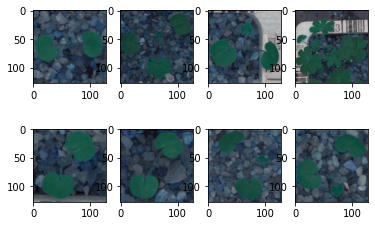

In [ ]:
# Show some example images
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])

# Apply image processing on the images:

- Gaussian Blurring.
- Normalization.
- Visualize data after pre-processing.

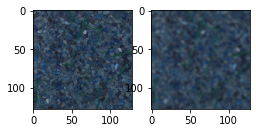

In [ ]:
preprocessed_images = []       # Initialize empty list to store the images after pre-processing.

for img in images:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
     
    
    preprocessed_images.append(blurImg)        # Append image 
    
    # Show examples

plt.subplot(1, 3, 1); plt.imshow(img)         # Show the original image
plt.subplot(1, 3, 2); plt.imshow(blurImg)     # Blur image

preprocessed_images = np.asarray(preprocessed_images)    # Convert to numpy array.

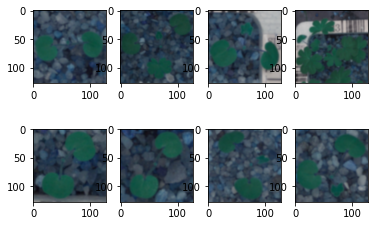

In [ ]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(preprocessed_images[i])

In [ ]:
# Normalize image data.
preprocessed_images = preprocessed_images / 255

# Make data compatible:

- Convert labels from digits to one hot vectors.
- Print the label for y_train[0].
- Check the shape of data, Reshape data into shapes compatible with Keras models, if already not compatible.


In [ ]:
# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels)

In [ ]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [ ]:
# Reshape data into shapes compatible with Keras models.

X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


So, we can see above that the data was already compatible with Keras, as the shape of data before and after reshaping is same.

In [ ]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)

In [ ]:
print(X_test.shape)
print(X_val.shape)

(712, 128, 128, 3)
(713, 128, 128, 3)


# Building CNN:

- Define layers.
- Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy)

In [ ]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [ ]:
# Set the optimizer and loss function, and compile the model with them.

optimizer = Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Set epochs = 40, and fit the model. 
history = model.fit(X_train, y_train, epochs = 40, validation_data = (X_val,Y_val),batch_size = batch_size)

Epoch 1/40
104/104 [==============================] - 7s 70ms/step - loss: 3.5849 - accuracy: 0.2220 - val_loss: 2.5889 - val_accuracy: 0.0575
Epoch 2/40
104/104 [==============================] - 6s 61ms/step - loss: 1.7642 - accuracy: 0.3795 - val_loss: 2.9843 - val_accuracy: 0.0589
Epoch 3/40
104/104 [==============================] - 6s 61ms/step - loss: 1.5746 - accuracy: 0.4565 - val_loss: 3.4364 - val_accuracy: 0.1276
Epoch 4/40
104/104 [==============================] - 6s 61ms/step - loss: 1.4274 - accuracy: 0.5053 - val_loss: 2.9814 - val_accuracy: 0.1613
Epoch 5/40
104/104 [==============================] - 6s 61ms/step - loss: 1.2981 - accuracy: 0.5606 - val_loss: 2.1434 - val_accuracy: 0.2539
Epoch 6/40
104/104 [==============================] - 6s 61ms/step - loss: 1.2344 - accuracy: 0.6000 - val_loss: 1.7217 - val_accuracy: 0.4151
Epoch 7/40
104/104 [==============================] - 6s 61ms/step - loss: 1.1557 - accuracy: 0.6156 - val_loss: 1.6927 - val_accuracy: 0.4348

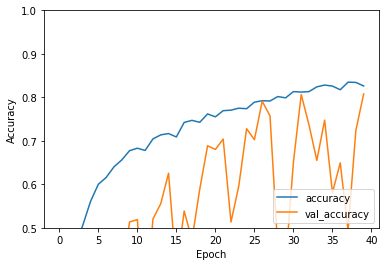

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right');

In [ ]:
# Evaluate the model.

score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5323989391326904
Test accuracy: 0.824438214302063


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


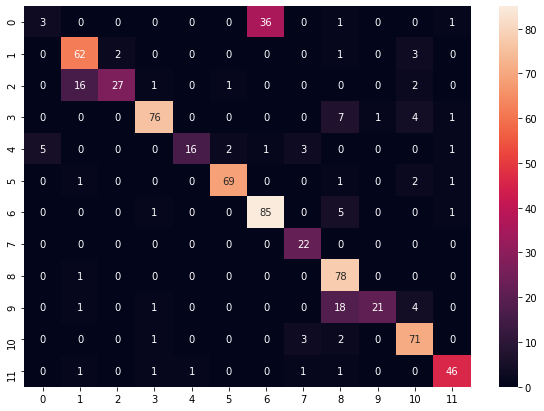

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

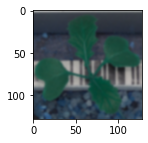

Predicted Label 1
True Label 1


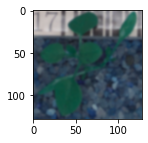

Predicted Label 3
True Label 3


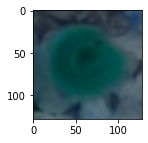

Predicted Label 7
True Label 7


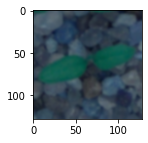

Predicted Label 3
True Label 3


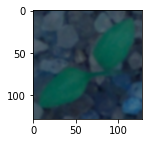

Predicted Label 3
True Label 3


In [ ]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[3],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[3].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[3]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[2],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[2].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[2]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[33],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[33].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[33]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[59].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[59]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[36],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[36].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[36]))